# Ordinary _least_squares

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling

In [3]:
import statsmodels.api as sm

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Regression/longley.csv")

In [26]:
df.head()

,Unnamed_0,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
0,1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1,1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
2,1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
3,1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
4,1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [6]:
df.tail()

,Unnamed: 0,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
11,1958,110.8,444.546,468.1,263.7,121.950,1958,66.513
12,1959,112.6,482.704,381.3,255.2,123.366,1959,68.655
13,1960,114.2,502.601,393.1,251.4,125.368,1960,69.564
14,1961,115.7,518.173,480.6,257.2,127.852,1961,69.331
15,1962,116.9,554.894,400.7,282.7,130.081,1962,70.551


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
Unnamed: 0      16 non-null int64
GNP.deflator    16 non-null float64
GNP             16 non-null float64
Unemployed      16 non-null float64
Armed.Forces    16 non-null float64
Population      16 non-null float64
Year            16 non-null int64
Employed        16 non-null float64
dtypes: float64(6), int64(2)
memory usage: 1.1 KB


In [22]:
pandas_profiling.ProfileReport(df)

In [8]:
df.describe()

,Unnamed: 0,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
count,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000
mean,1954.500000,101.681250,387.698438,319.331250,260.66875,117.424000,1954.500000,65.317000
std,4.760952,10.791553,99.394938,93.446425,69.59196,6.956102,4.760952,3.511968
min,1947.000000,83.000000,234.289000,187.000000,145.60000,107.608000,1947.000000,60.171000
25%,1950.750000,94.525000,317.881000,234.825000,229.80000,111.788500,1950.750000,62.712500
50%,1954.500000,100.600000,381.427000,314.350000,271.75000,116.803500,1954.500000,65.504000
75%,1958.250000,111.250000,454.085500,384.250000,306.07500,122.304000,1958.250000,68.290500
max,1962.000000,116.900000,554.894000,480.600000,359.40000,130.081000,1962.000000,70.551000


In [9]:
y = df.Employed #response/Traget
X = df.GNP #predictor/input
X = sm.add_constant(X)  #Adds a constant term to the predictor
X.head()

c:\users\shaik shameer\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,GNP
0,1.0,234.289
1,1.0,259.426
2,1.0,258.054
3,1.0,284.599
4,1.0,328.975


In [10]:
X.tail()

,const,GNP
11,1.0,444.546
12,1.0,482.704
13,1.0,502.601
14,1.0,518.173
15,1.0,554.894


In [11]:
est = sm.OLS(y, X)

In [12]:
est

In [13]:
est = est.fit()
est.summary()

c:\users\shaik shameer\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Tue, 24 Mar 2020   Prob (F-statistic):           8.36e-12
Time:                        09:14:55   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.8436      0.681     76.087      0.000      50.382      53.305
GNP            0.0348      0.002     20.374      0.000       0.031       0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
est.params

const    51.843590
GNP       0.034752
dtype: float64

In [15]:
X_prime = np.linspace(X.GNP.min(), X.GNP.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime) # add constant as we did before
X_prime

array([[  1.        , 234.289     ],
       [  1.        , 237.52743434],
       [  1.        , 240.76586869],
       [  1.        , 244.00430303],
       [  1.        , 247.24273737],
       [  1.        , 250.48117172],
       [  1.        , 253.71960606],
       [  1.        , 256.9580404 ],
       [  1.        , 260.19647475],
       [  1.        , 263.43490909],
       [  1.        , 266.67334343],
       [  1.        , 269.91177778],
       [  1.        , 273.15021212],
       [  1.        , 276.38864646],
       [  1.        , 279.62708081],
       [  1.        , 282.86551515],
       [  1.        , 286.10394949],
       [  1.        , 289.34238384],
       [  1.        , 292.58081818],
       [  1.        , 295.81925253],
       [  1.        , 299.05768687],
       [  1.        , 302.29612121],
       [  1.        , 305.53455556],
       [  1.        , 308.7729899 ],
       [  1.        , 312.01142424],
       [  1.        , 315.24985859],
       [  1.        , 318.48829293],
 

In [16]:
y_hat = est.predict(X_prime)
y_hat

array([59.98567007, 60.0982131 , 60.21075612, 60.32329914, 60.43584217,
       60.54838519, 60.66092821, 60.77347124, 60.88601426, 60.99855728,
       61.11110031, 61.22364333, 61.33618635, 61.44872938, 61.5612724 ,
       61.67381543, 61.78635845, 61.89890147, 62.0114445 , 62.12398752,
       62.23653054, 62.34907357, 62.46161659, 62.57415961, 62.68670264,
       62.79924566, 62.91178868, 63.02433171, 63.13687473, 63.24941775,
       63.36196078, 63.4745038 , 63.58704683, 63.69958985, 63.81213287,
       63.9246759 , 64.03721892, 64.14976194, 64.26230497, 64.37484799,
       64.48739101, 64.59993404, 64.71247706, 64.82502008, 64.93756311,
       65.05010613, 65.16264915, 65.27519218, 65.3877352 , 65.50027823,
       65.61282125, 65.72536427, 65.8379073 , 65.95045032, 66.06299334,
       66.17553637, 66.28807939, 66.40062241, 66.51316544, 66.62570846,
       66.73825148, 66.85079451, 66.96333753, 67.07588055, 67.18842358,
       67.3009666 , 67.41350963, 67.52605265, 67.63859567, 67.75

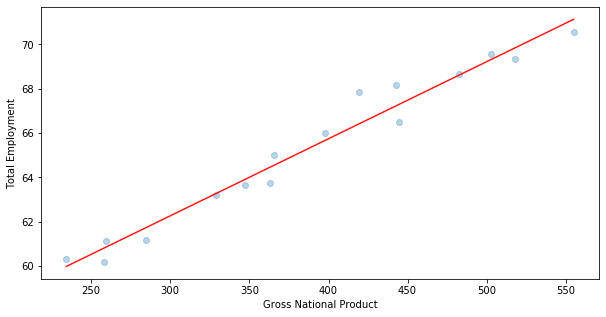

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(X.GNP, y , alpha=0.3) # plot the raw data
plt.xlabel("Gross National Product")
plt.ylabel("Total Employment")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9) # Add the regression line, colored in red
plt.show()

In [18]:
# import formula api as alias smf
import statsmodels.formula.api as smf

In [19]:
# formula: response ~ predictors
est = smf.ols(formula='Employed ~ GNP', data=df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Tue, 24 Mar 2020   Prob (F-statistic):           8.36e-12
Time:                        09:14:56   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.8436      0.681     76.087      0.000      50.382      53.305
GNP            0.0348      0.002     20.374      0.000       0.031       0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
h = df.GNP
g = df.Population
g =sm.add_constant(g)
g.head()

,const,Population
0,1.0,107.608
1,1.0,108.632
2,1.0,109.773
3,1.0,110.929
4,1.0,112.075


In [29]:
g.tail()

,const,Population
11,1.0,121.950
12,1.0,123.366
13,1.0,125.368
14,1.0,127.852
15,1.0,130.081


In [30]:
q = sm.OLS(h,g)
q

In [31]:
q = q.fit()
q.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GNP   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     775.2
Date:                Tue, 24 Mar 2020   Prob (F-statistic):           1.17e-13
Time:                        19:30:49   Log-Likelihood:                -63.517
No. Observations:                  16   AIC:                             131.0
Df Residuals:                      14   BIC:                             132.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1275.2100     59.826    -21.315      0.000   -1403.523   -1146.897
Population    14.1616      0.509     27.842      0.000      13.071      15.253
==============================================================================
Omnibus:                        5.251   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                1.471
Skew:                          -0.095   Prob(JB):                        0.479
Kurtosis:                       1.527   Cond. No.                     2.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
q.params

const        -1275.210039
Population      14.161572
dtype: float64

In [33]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [35]:
g_prime = np.linspace(g.Population.max(),g.Population.min(),10)[:,np.newaxis]
g_prime = np.linspace(g.Population.max(),g.Population.min(),100)[:,np.newaxis]
g_prime = sm.add_constant(g_prime)
g_prime

array([[  1.   , 130.081],
       [  1.   , 129.854],
       [  1.   , 129.627],
       [  1.   , 129.4  ],
       [  1.   , 129.173],
       [  1.   , 128.946],
       [  1.   , 128.719],
       [  1.   , 128.492],
       [  1.   , 128.265],
       [  1.   , 128.038],
       [  1.   , 127.811],
       [  1.   , 127.584],
       [  1.   , 127.357],
       [  1.   , 127.13 ],
       [  1.   , 126.903],
       [  1.   , 126.676],
       [  1.   , 126.449],
       [  1.   , 126.222],
       [  1.   , 125.995],
       [  1.   , 125.768],
       [  1.   , 125.541],
       [  1.   , 125.314],
       [  1.   , 125.087],
       [  1.   , 124.86 ],
       [  1.   , 124.633],
       [  1.   , 124.406],
       [  1.   , 124.179],
       [  1.   , 123.952],
       [  1.   , 123.725],
       [  1.   , 123.498],
       [  1.   , 123.271],
       [  1.   , 123.044],
       [  1.   , 122.817],
       [  1.   , 122.59 ],
       [  1.   , 122.363],
       [  1.   , 122.136],
       [  1.   , 121.909],
 

In [36]:
ghat = q.predict(g_prime)
ghat

array([566.94145922, 563.72678229, 560.51210536, 557.29742842,
       554.08275149, 550.86807456, 547.65339763, 544.43872069,
       541.22404376, 538.00936683, 534.7946899 , 531.58001297,
       528.36533603, 525.1506591 , 521.93598217, 518.72130524,
       515.5066283 , 512.29195137, 509.07727444, 505.86259751,
       502.64792058, 499.43324364, 496.21856671, 493.00388978,
       489.78921285, 486.57453592, 483.35985898, 480.14518205,
       476.93050512, 473.71582819, 470.50115125, 467.28647432,
       464.07179739, 460.85712046, 457.64244353, 454.42776659,
       451.21308966, 447.99841273, 444.7837358 , 441.56905887,
       438.35438193, 435.139705  , 431.92502807, 428.71035114,
       425.4956742 , 422.28099727, 419.06632034, 415.85164341,
       412.63696648, 409.42228954, 406.20761261, 402.99293568,
       399.77825875, 396.56358182, 393.34890488, 390.13422795,
       386.91955102, 383.70487409, 380.49019715, 377.27552022,
       374.06084329, 370.84616636, 367.63148943, 364.41

In [37]:
results =pd.Series({'oringal_values':g,
                   'predicted_values':ghat})
results

oringal_values          const  Population
0     1.0     107.608
1 ...
predicted_values    [566.9414592194114, 563.7267822872548, 560.512...
dtype: object

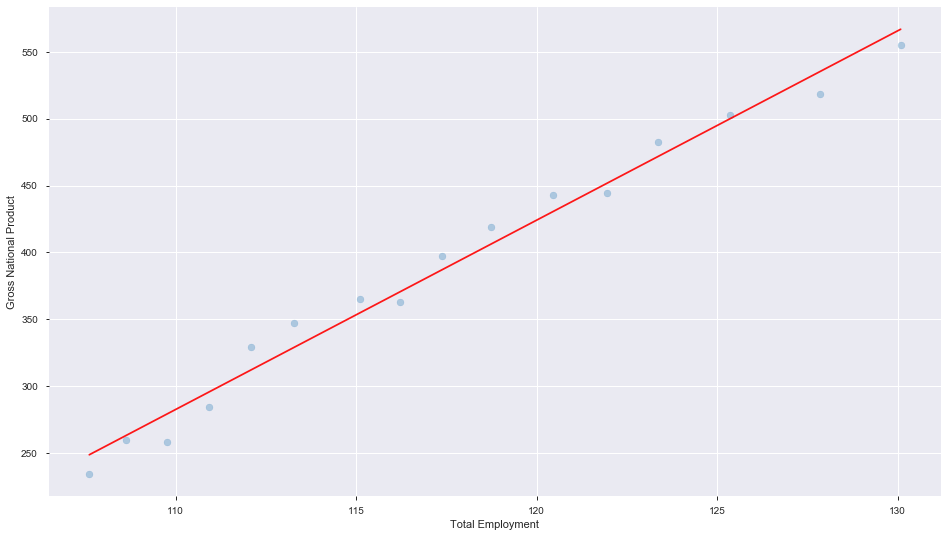

In [39]:
plt.figure(figsize=(16,9))
plt.scatter(g.Population,h,alpha=0.3) #plot the raw data
plt.ylabel('Gross National Product')
plt.xlabel("Total Employment")
plt.plot(g_prime[:,1],ghat,'r',alpha=0.9) #add the regression line colored in red

In [46]:
q= smf.ols(formula = 'GNP~Population', data=df).fit()
q.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GNP   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     775.2
Date:                Tue, 24 Mar 2020   Prob (F-statistic):           1.17e-13
Time:                        19:42:00   Log-Likelihood:                -63.517
No. Observations:                  16   AIC:                             131.0
Df Residuals:                      14   BIC:                             132.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1275.2100     59.826    -21.315      0.000   -1403.523   -1146.897
Population    14.1616      0.509     27.842      0.000      13.071      15.253
==============================================================================
Omnibus:                        5.251   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                1.471
Skew:                          -0.095   Prob(JB):                        0.479
Kurtosis:                       1.527   Cond. No.                     2.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
e = df.Unemployed
f= df.Employed
f = sm.add_constant(f)
f.head()

,const,Employed
0,1.0,60.323
1,1.0,61.122
2,1.0,60.171
3,1.0,61.187
4,1.0,63.221


In [48]:
f.tail()

,const,Employed
11,1.0,66.513
12,1.0,68.655
13,1.0,69.564
14,1.0,69.331
15,1.0,70.551


In [49]:
w=sm.OLS(e,f)
w

In [50]:
w = w.fit()
w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Unemployed   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     4.729
Date:                Tue, 24 Mar 2020   Prob (F-statistic):             0.0473
Time:                        19:43:10   Log-Likelihood:                -92.457
No. Observations:                  16   AIC:                             188.9
Df Residuals:                      14   BIC:                             190.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -553.9874    402.130     -1.378      0.190   -1416.470     308.496
Employed      13.3705      6.148      2.175      0.047       0.184      26.557
==============================================================================
Omnibus:                        1.368   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.505   Jarque-Bera (JB):                0.866
Skew:                           0.174   Prob(JB):                        0.649
Kurtosis:                       1.915   Cond. No.                     1.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
w.params

const      -553.987401
Employed     13.370465
dtype: float64

In [54]:
f_prime = np.linspace(f.Employed.min(),f.Employed.max(),10)[:,np.newaxis]
f_prime = np.linspace(f.Employed.min(),f.Employed.max(),100)[:,np.newaxis]
f_prime = sm.add_constant(f_prime)
f_prime

array([[ 1.        , 60.171     ],
       [ 1.        , 60.27584848],
       [ 1.        , 60.38069697],
       [ 1.        , 60.48554545],
       [ 1.        , 60.59039394],
       [ 1.        , 60.69524242],
       [ 1.        , 60.80009091],
       [ 1.        , 60.90493939],
       [ 1.        , 61.00978788],
       [ 1.        , 61.11463636],
       [ 1.        , 61.21948485],
       [ 1.        , 61.32433333],
       [ 1.        , 61.42918182],
       [ 1.        , 61.5340303 ],
       [ 1.        , 61.63887879],
       [ 1.        , 61.74372727],
       [ 1.        , 61.84857576],
       [ 1.        , 61.95342424],
       [ 1.        , 62.05827273],
       [ 1.        , 62.16312121],
       [ 1.        , 62.2679697 ],
       [ 1.        , 62.37281818],
       [ 1.        , 62.47766667],
       [ 1.        , 62.58251515],
       [ 1.        , 62.68736364],
       [ 1.        , 62.79221212],
       [ 1.        , 62.89706061],
       [ 1.        , 63.00190909],
       [ 1.        ,

In [55]:
fhat = w.predict(f_prime)
fhat

array([250.52683802, 251.928711  , 253.33058398, 254.73245696,
       256.13432993, 257.53620291, 258.93807589, 260.33994887,
       261.74182185, 263.14369483, 264.5455678 , 265.94744078,
       267.34931376, 268.75118674, 270.15305972, 271.5549327 ,
       272.95680568, 274.35867865, 275.76055163, 277.16242461,
       278.56429759, 279.96617057, 281.36804355, 282.76991652,
       284.1717895 , 285.57366248, 286.97553546, 288.37740844,
       289.77928142, 291.18115439, 292.58302737, 293.98490035,
       295.38677333, 296.78864631, 298.19051929, 299.59239227,
       300.99426524, 302.39613822, 303.7980112 , 305.19988418,
       306.60175716, 308.00363014, 309.40550311, 310.80737609,
       312.20924907, 313.61112205, 315.01299503, 316.41486801,
       317.81674098, 319.21861396, 320.62048694, 322.02235992,
       323.4242329 , 324.82610588, 326.22797886, 327.62985183,
       329.03172481, 330.43359779, 331.83547077, 333.23734375,
       334.63921673, 336.0410897 , 337.44296268, 338.84

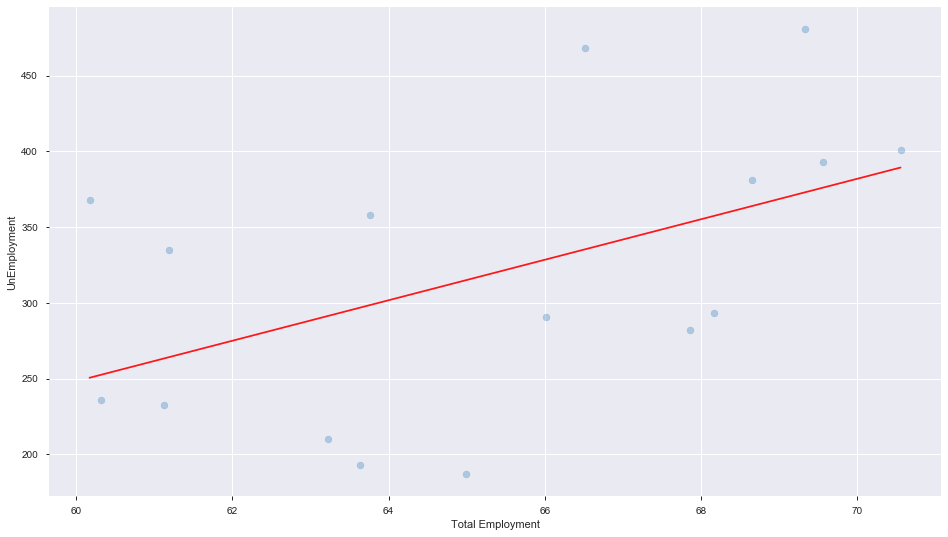

In [56]:
plt.figure(figsize=(16,9))
plt.scatter(f.Employed,e,alpha=0.3) #plot the raw data
plt.ylabel("UnEmployment")
plt.xlabel("Total Employment")
plt.plot(f_prime[:,1],fhat,'r',alpha=0.9) #add the regression line colored in red

In [58]:
a =smf.ols(formula='Unemployed ~ Employed', data=df).fit()
a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Unemployed   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     4.729
Date:                Tue, 24 Mar 2020   Prob (F-statistic):             0.0473
Time:                        19:50:14   Log-Likelihood:                -92.457
No. Observations:                  16   AIC:                             188.9
Df Residuals:                      14   BIC:                             190.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -553.9874    402.130     -1.378      0.190   -1416.470     308.496
Employed      13.3705      6.148      2.175      0.047       0.184      26.557
==============================================================================
Omnibus:                        1.368   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.505   Jarque-Bera (JB):                0.866
Skew:                           0.174   Prob(JB):                        0.649
Kurtosis:                       1.915   Cond. No.                     1.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""